<a href="https://colab.research.google.com/github/smlra-kjsce/Ensemble-Learning/blob/main/Decision%20Trees/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction and Theory

## What are Decision Trees?


Node: These features are present at the tree nodes. Nodes are basically the decision making entities in decision trees.

Root Node: The nose at the very top of the tree is called the root node.

Leaf Node: The node that has no other nodes or which is the final decision is called the leaf node.

## EDA

In [ ]:
from google.colab import drive  
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
frame = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/500_Person_Gender_Height_Weight_Index.csv")
frame.head(10)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
7,Male,154,111,5
8,Male,174,90,3
9,Female,169,103,4


In [ ]:
frame['obese'] = (frame.Index >= 4).astype('int')
frame.drop('Index', axis = 1, inplace = True)


In [ ]:
frame.head(10)

,Gender,Height,Weight,obese
0,Male,174,96,1
1,Male,189,87,0
2,Female,185,110,1
3,Female,195,104,0
4,Male,149,61,0
5,Male,189,104,0
6,Male,147,92,1
7,Male,154,111,1
8,Male,174,90,0
9,Female,169,103,1


In [ ]:
np.sum((frame.Height.value_counts()/500)**2)

0.018520000000000005

In [ ]:
x = frame[['Gender', 'Height', 'Weight']]
y = frame['obese']

In [ ]:
x['Gender'] = (x.Gender == 'Male').astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x

,Gender,Height,Weight
0,1,174,96
1,1,189,87
2,0,185,110
3,0,195,104
4,1,149,61
...,...,...,...
495,0,150,153
496,0,184,121
497,0,141,136
498,1,150,95


In [ ]:
frame.Weight.sort_values().unique()[1:]

array([ 51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160])

## Cost Functions and Concept of Impurity

Impurity is the measure of the difference in the samples. Basically it measures how much of the sample data points are different in nature. 

Gini says, if we select two items from a population at random then they must be of the same class and the probability for this is 1 if the population is pure.


## How to Calculate impurity?

In [ ]:
def gini_impurity(y):
    p = y.value_counts()/y.shape[0]
    gini = 1-np.sum(p**2)
    return(gini)
    
def entropy(y):
    a = y.value_counts()/y.shape[0]
    entropy = np.sum(-a*np.log2(a+1e-9))
    return(entropy)

## How to select the best cut/split?

A less impure node requires less information to describe it and, a more impure node requires more information. Information theory is a measure to define this degree of disorganization in a system known as Entropy. If the sample is completely homogeneous, then the entropy is zero and if the sample is equally divided (50% — 50%), it has an entropy of one. Entropy is calculated as follows.

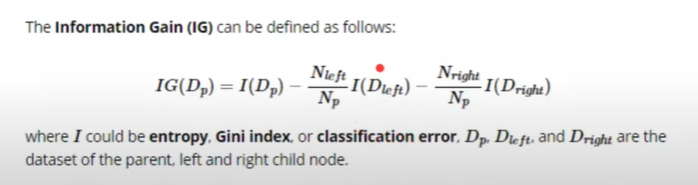

In [ ]:
def information_gain(y, mask, func=entropy):
  Nleft = sum(mask)
  Nright = mask.shape[0] - Nleft
  Np = Nleft + Nright
  conditionIG = mask
  Dp = y
  Dleft = y[mask]
  Dright = y[-mask]

  if (Nleft == 0 or Nright ==0): 
    infoGain = 0
  
  else:
    infoGain = func(Dp) - Nleft*func(Dleft)/Np - Nright*func(Dright)/Np
  
  return infoGain

In [ ]:

InfoGain_weight80 = information_gain(frame["obese"], frame["Weight"]>80) 
InfoGain_weight100 = information_gain(frame["obese"], frame["Weight"]>100) 

print("info gain for >80 is ", InfoGain_weight80, "info gain for >100 is", InfoGain_weight100 )

info gain for >80 is  0.3090870720049868 info gain for >100 is 0.3621623817673464


## Depth of a tree

Hyperparameters: 

- max_depth: maximum depth of the tree. If we set it to None, the tree will grow until all the leaves are pure or the hyperparameter min_samples_split has been reached.


- min_samples_split: indicates the minimum number of observations a sheet must have to continue creating new nodes.


- min_information_gain: the minimum amount the Information Gain must increase for the tree to continue growing.

- max_leaf: max number of leaf nodes. 

# Code Implementation

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder #for train test splitting
from sklearn.model_selection import train_test_split #for decision tree object
from sklearn.tree import DecisionTreeClassifier #for checking testing results
from sklearn.metrics import classification_report, confusion_matrix #for visualizing tree 
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

## Data Preprocessing

In [ ]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_lab = train_test_split(x,y,
                                                 test_size = 0.4,
                                                 random_state = 42)

In [ ]:
clf = DecisionTreeClassifier(max_depth =5, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
#save the feature name and target variables
feature_names = x.columns
labels = y.unique()

In [ ]:
labels = ["Obese", "Fit"]

## Visualization

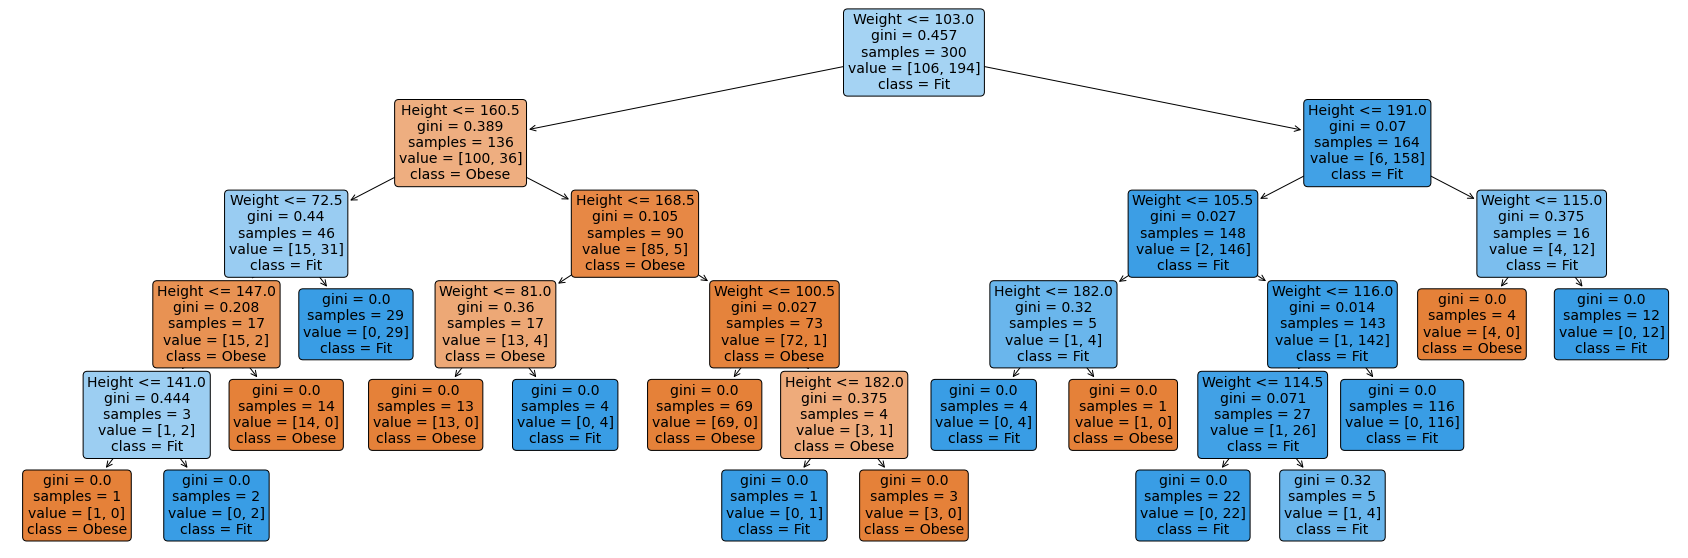

In [ ]:
#import relevant packages
from sklearn import tree
import matplotlib.pyplot as plt
#plt the figure, setting a black background
plt.figure(figsize=(30,10))
#create the tree plot
a = tree.plot_tree(clf,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.show()

In [ ]:
#import relevant functions
from sklearn.tree import export_text
#export the decision rules
tree_rules = export_text(clf,
                        feature_names = list(feature_names))
#print the result
print(tree_rules)

|--- Weight <= 103.00
|   |--- Height <= 160.50
|   |   |--- Weight <= 72.50
|   |   |   |--- Height <= 147.00
|   |   |   |   |--- Height <= 141.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Height >  141.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- Height >  147.00
|   |   |   |   |--- class: 0
|   |   |--- Weight >  72.50
|   |   |   |--- class: 1
|   |--- Height >  160.50
|   |   |--- Height <= 168.50
|   |   |   |--- Weight <= 81.00
|   |   |   |   |--- class: 0
|   |   |   |--- Weight >  81.00
|   |   |   |   |--- class: 1
|   |   |--- Height >  168.50
|   |   |   |--- Weight <= 100.50
|   |   |   |   |--- class: 0
|   |   |   |--- Weight >  100.50
|   |   |   |   |--- Height <= 182.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Height >  182.00
|   |   |   |   |   |--- class: 0
|--- Weight >  103.00
|   |--- Height <= 191.00
|   |   |--- Weight <= 105.50
|   |   |   |--- Height <= 182.00
|   |   |   |   |--- class: 1
|   |   |   |--- Height >  182

## Making predictions

In [ ]:
test_pred_decision_tree = clf.predict(test_x)

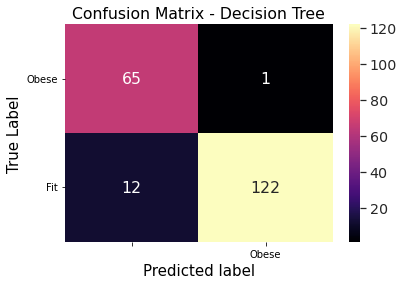

<Figure size 720x504 with 0 Axes>

In [ ]:

#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_lab,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

# Datasets or References

- https://smlra-kjsce.medium.com/understanding-decision-trees-8a3a78494836
- https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
- https://www.analyticsvidhya.com/blog/2021/07/a-comprehensive-guide-to-decision-trees/
- https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree